In [12]:
import numpy as np
import argparse
import cv2
import os

In [13]:
original =  cv2.imread('C:\\Users\\cheon\\MasterData\\newTestSet\\mLForward\\sbnt220.png');
original

array([[[161, 157, 153],
        [161, 157, 153],
        [161, 157, 153],
        ...,
        [110, 118, 131],
        [108, 116, 129],
        [108, 116, 129]],

       [[160, 156, 152],
        [160, 156, 152],
        [160, 156, 152],
        ...,
        [107, 115, 128],
        [107, 115, 128],
        [107, 115, 128]],

       [[160, 155, 154],
        [160, 155, 154],
        [160, 155, 154],
        ...,
        [106, 114, 127],
        [107, 115, 128],
        [107, 115, 128]],

       ...,

       [[154, 152, 148],
        [154, 152, 148],
        [154, 152, 148],
        ...,
        [166, 164, 160],
        [166, 164, 160],
        [166, 164, 160]],

       [[154, 152, 148],
        [154, 152, 148],
        [154, 152, 148],
        ...,
        [166, 164, 160],
        [166, 164, 160],
        [166, 164, 160]],

       [[154, 152, 148],
        [154, 152, 148],
        [154, 152, 148],
        ...,
        [166, 164, 160],
        [166, 164, 160],
        [166, 164, 160]]

In [14]:
cv2.imshow('color image',original) 
cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)

-1

In [15]:
width = 512
height = 512
dim = (width, height)
 
# resize image
resized = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resized Dimensions :  (512, 512, 3)


In [16]:
# define the upper and lower boundaries of the HSV pixel
# intensities to be considered 'skin'

#sa values
#lower = np.array([60, 50, 20], dtype = "uint8")
#upper = np.array([200, 255, 255], dtype = "uint8")

#sb values
#lower = np.array([90, 30, 20], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#sc values
#lower = np.array([30, 5,0], dtype = "uint8")
#upper = np.array([180, 255, 160], dtype = "uint8")

#sd values
#lower = np.array([20, 20, 100], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#se values
#lower = np.array([90, 70, 70], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

#sf values
#lower = np.array([60, 60, 60], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

In [7]:
converted = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)
blur = cv2.blur(converted,(5,5))


    

In [ ]:
data = img_to_array(converted)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-20,20],height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)

In [17]:
skinMask = cv2.inRange(converted, lower, upper)
cv2.imshow('result', skinMask)
cv2.waitKey()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# apply a series of erosions and dilations to the mask
# using an elliptical kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
skinMask = cv2.erode(skinMask, kernel, iterations = 2)
skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
skin = cv2.bitwise_and(resized, resized, mask = skinMask)
# show the skin in the image along with the mask
cv2.imshow("images", skinMask)

# show the skin in the image along with the mask
#cv2.imshow("Mask image", skinMask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [39]:
#Test (NOT WORKING) for further shadow removal by taking only larges contour
output = skin
contours, hierarchy = cv2.findContours(skinMask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
blank_mask = np.zeros(output.shape, dtype=np.uint8)

if len(contours) != 0:
    # draw in blue the contours that were founded

    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    
    cv2.fillPoly(blank_mask, [c], (255,255,255))


# show the images
cv2.imshow("Result", blank_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [15]:
#sa values
#lower = np.array([60, 50, 20], dtype = "uint8")
#upper = np.array([200, 255, 255], dtype = "uint8")

#sb values
#lower = np.array([90, 30, 20], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#sc values
#lower = np.array([30, 5,0], dtype = "uint8")
#upper = np.array([180, 255, 160], dtype = "uint8")

#sd values
#lower = np.array([20, 20, 100], dtype = "uint8")
#upper = np.array([180, 255, 200], dtype = "uint8")

#se values
#lower = np.array([90, 70, 70], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

#sf values
#lower = np.array([60, 60, 60], dtype = "uint8")
#upper = np.array([180, 255, 255], dtype = "uint8")

In [13]:
#Function to convert images to mask 
#Manually set lower and upper boundaries depending on the userclass
#No one size fit all method

import numpy as np
import argparse
import cv2
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


def massconvert(imageDir,filename,saveDir):
    original =  cv2.imread(imageDir);
    width = 512
    height = 512
    dim = (width, height)

    # resize image
    resized = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)

    # define the upper and lower boundaries of the HSV pixel
    # intensities to be considered 'skin'
    
    #sa values
    #lower = np.array([60, 50, 20], dtype = "uint8")
    #upper = np.array([200, 255, 255], dtype = "uint8")

    #sb values
    #lower = np.array([90, 30, 20], dtype = "uint8")
    #upper = np.array([180, 255, 200], dtype = "uint8")

    #sc values
    #lower = np.array([30, 5,0], dtype = "uint8")
    #upper = np.array([180, 255, 160], dtype = "uint8")

    #sd values
    #lower = np.array([20, 20, 100], dtype = "uint8")
    #upper = np.array([180, 255, 200], dtype = "uint8")

    #se values
    #lower = np.array([90, 70, 70], dtype = "uint8")
    #upper = np.array([180, 255, 255], dtype = "uint8")

    #sf values
    lower = np.array([60, 60, 60], dtype = "uint8")
    upper = np.array([180, 255, 255], dtype = "uint8")
    
    converted = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)
    
    #DATA AUGMENTATION LOOP
    data = img_to_array(converted)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(width_shift_range=[-40,40],height_shift_range=0.3,zoom_range=0.3)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    # generate samples and plot
    for i in range(6):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        # plot raw pixel data
        pyplot.imshow(image)
        skinMask = cv2.inRange(image, lower, upper)
        # apply a series of erosions and dilations to the mask
        # using an elliptical kernel
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        skinMask = cv2.erode(skinMask, kernel, iterations = 3)
        skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
        skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
        cv2.imwrite(saveDir + '\\AUGPR' + str(i) + filename , skinMask)
        #print(saveDir + '\\AUGPR' + filename)
        
        
    skinMask = cv2.inRange(converted, lower, upper)
    # apply a series of erosions and dilations to the mask
    # using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skinMask = cv2.erode(skinMask, kernel, iterations = 3)
    skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
    cv2.imwrite(saveDir + '\\PR'  + filename , skinMask)
    #print(saveDir + '\\PR' + filename)


In [25]:
#Function to convert images to mask , augmented using the binary mask instead

import numpy as np
import argparse
import cv2
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot


def massconvert(imageDir,filename,saveDir):
    original =  cv2.imread(imageDir);
    width = 512
    height = 512
    dim = (width, height)

    # resize image
    resized = cv2.resize(original, dim, interpolation = cv2.INTER_AREA)

    # define the upper and lower boundaries of the HSV pixel
    # intensities to be considered 'skin'
    
    #sa values
    #lower = np.array([60, 50, 20], dtype = "uint8")
    #upper = np.array([200, 255, 255], dtype = "uint8")

    #sb values
    #lower = np.array([90, 30, 20], dtype = "uint8")
    #upper = np.array([180, 255, 200], dtype = "uint8")

    #sc values
    #lower = np.array([30, 5,0], dtype = "uint8")
    #upper = np.array([180, 255, 160], dtype = "uint8")

    #sd values
    lower = np.array([20, 20, 100], dtype = "uint8")
    upper = np.array([180, 255, 200], dtype = "uint8")

    #se values
    #lower = np.array([90, 70, 70], dtype = "uint8")
    #upper = np.array([180, 255, 255], dtype = "uint8")

    #sf values
    #lower = np.array([60, 60, 60], dtype = "uint8")
    #upper = np.array([180, 255, 255], dtype = "uint8")
    
    converted = cv2.cvtColor(resized, cv2.COLOR_RGB2HSV)
    
    #Generate Binary Skin Mask
    skinMask = cv2.inRange(converted, lower, upper)
    # apply a series of erosions and dilations to the mask
    # using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    skinMask = cv2.erode(skinMask, kernel, iterations = 3)
    skinMask = cv2.dilate(skinMask, kernel, iterations = 5)
    skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
    cv2.imwrite(saveDir + '\\PR' + filename , skinMask)
    
    #DATA AUGMENTATION LOOP
    data = img_to_array(skinMask)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    # create image data augmentation generator
    datagen = ImageDataGenerator(width_shift_range=0.2,height_shift_range=0.2,zoom_range=0.2)
    # prepare iterator
    it = datagen.flow(samples, batch_size=1)
    #print(saveDir + '\\PR' + filename)
    # generate samples and plot
    for i in range(9):
        # define subplot
        pyplot.subplot(330 + 1 + i)
        # generate batch of images
        batch = it.next()
        # convert to unsigned integers for viewing
        image = batch[0].astype('uint8')
        cv2.imwrite(saveDir + '\\AUGPR' + str(i) + filename , image)
        #print(saveDir + '\\AUGPR' + filename)
        
        


In [26]:
#Function to loop through the subdirectory andd convert all images matching prefix(which indicatesa a certain user's feet type)

def conversionLoop(mainDir,subdirectory,prefix):
    saveDir = 'C:\\Users\Cheon\MasterData\\ktraining\\' + subdirectory
    print('Executing loop ' + subdirectory + ' PREFIX: ' + prefix)
    import os, re
    pfName = mainDir + subdirectory
    for i in os.listdir(pfName):
        #rint(os.path.join(pfName,i))
        if os.path.isfile(os.path.join(pfName,i)) and i.startswith(prefix):
            #print(pfName)
            massconvert(os.path.join(pfName,i),i,saveDir)
            #print(os.path.join(pfName,i))
   

Executing loop Close PREFIX: sd
Starting
Executing loop LForward PREFIX: sd
Starting
Executing loop LTurn PREFIX: sd
Starting
Executing loop Neutral PREFIX: sd
Starting
Executing loop PointIn PREFIX: sd
Starting
Executing loop PointOut PREFIX: sd
Starting
Executing loop RForward PREFIX: sd
Starting
Executing loop RTurn PREFIX: sd
Starting
operation Complete


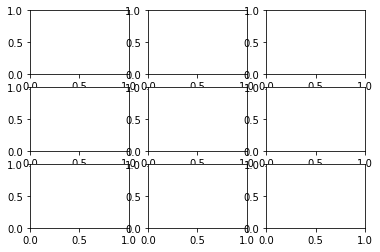

In [27]:
#Execute conversion loop in all subdirectories
import scipy
from scipy import ndimage
dirList = ['Close','LForward','LTurn','Neutral','PointIn','PointOut','RForward','RTurn']
for i in dirList:
    conversionLoop('C:\\Users\Cheon\MasterData\\raws\\' ,i,'sd')
    print('Starting')
print('operation Complete')

In [ ]:
for root, subdirectories, files in os.walk(directory):
    for subdirectory in subdirectories:
        print(subdirectory)

In [ ]:
#Test for auto skin thresholding using foot-at-center as example


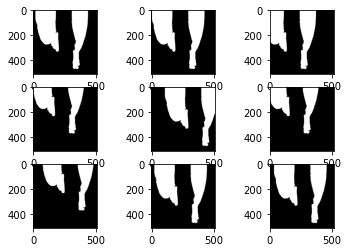

In [317]:
#Data augmentation TEST Segment

#Model Training Segment
# example of horizontal shift image augmentation
from numpy import expand_dims
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = cv2.imread('C:\\Users\Cheon\MasterData\mLForward\PRsfn52.png');
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-50,50],height_shift_range=0.2)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [29]:
import splitfolders
import splitfolders
splitfolders.ratio('C:\\Users\Cheon\MasterData\ktraining', output="C:\\Users\Cheon\MasterData\ktraining", seed=1337, ratio=(.8,0,.2)) 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
batch_size = 16
STEPS_PER_EPOCH = batch_size
data_dir = 'C:\\Users\\Cheon\\MasterData\\ktraining\\train'
test_dir = 'C:\\Users\\Cheon\\MasterData\\ktraining\\test'
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  image_size=(64, 64),
  subset="training",
  seed=123,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  image_size=(64, 64),
  subset="validation",
  seed=123,
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  image_size=(64, 64),
  seed=123,
  batch_size=batch_size)

Found 10056 files belonging to 8 classes.
Using 7040 files for training.
Found 10056 files belonging to 8 classes.
Using 3016 files for validation.
Found 2514 files belonging to 8 classes.


In [7]:
class_names = train_ds.class_names
print(class_names)



['Close', 'LForward', 'LTurn', 'Neutral', 'PointIn', 'PointOut', 'RForward', 'RTurn']


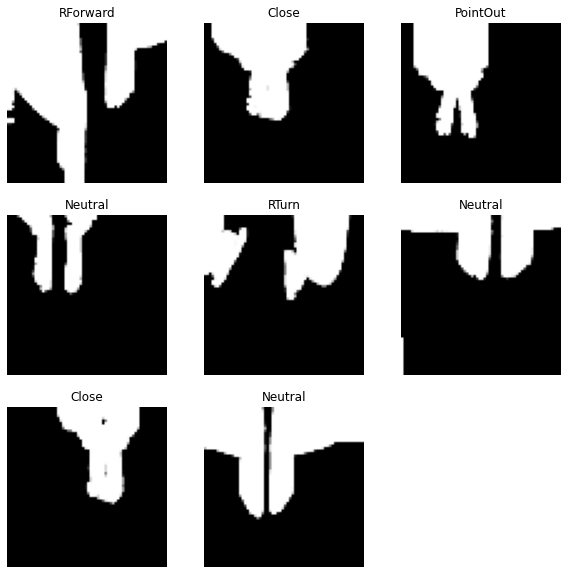

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [5]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 64, 64, 3)
(16,)


In [3]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=STEPS_PER_EPOCH*10,
  decay_rate=1,
  staircase=False)


def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

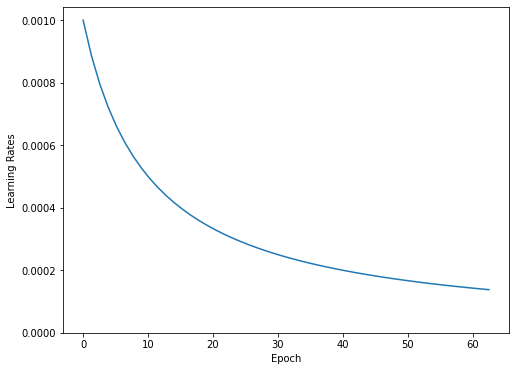

In [4]:
step = np.linspace(0,1000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rates')

In [5]:
def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_binary_crossentropy', patience=200),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

In [8]:
num_classes = len(class_names)
img_height = 64
img_width = 64

model = Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(num_classes)
])

In [9]:
optimizer = get_optimizer()
model.compile(optimizer= get_optimizer(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[
                  tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True, name='Sparse_Categorical_Crossentropy'),
                  'accuracy'])

In [10]:
model.summary()


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [11]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
440/440 [==============================] - 10s 14ms/step - loss: 2.9868 - Sparse_Categorical_Crossentropy: 2.4096 - accuracy: 0.5541 - val_loss: 1.1181 - val_Sparse_Categorical_Crossentropy: 0.5526 - val_accuracy: 0.8286
Epoch 2/10
440/440 [==============================] - 6s 14ms/step - loss: 0.9596 - Sparse_Categorical_Crossentropy: 0.4043 - accuracy: 0.8723 - val_loss: 0.8653 - val_Sparse_Categorical_Crossentropy: 0.3199 - val_accuracy: 0.9038
Epoch 3/10
440/440 [==============================] - 6s 13ms/step - loss: 0.7377 - Sparse_Categorical_Crossentropy: 0.2018 - accuracy: 0.9372 - val_loss: 0.7845 - val_Sparse_Categorical_Crossentropy: 0.2567 - val_accuracy: 0.9218
Epoch 4/10
440/440 [==============================] - 6s 13ms/step - loss: 0.6560 - Sparse_Categorical_Crossentropy: 0.1366 - accuracy: 0.9580 - val_loss: 0.7510 - val_Sparse_Categorical_Crossentropy: 0.2386 - val_accuracy: 0.9231
Epoch 5/10
440/440 [==============================] - 6s 13ms/step - loss: 

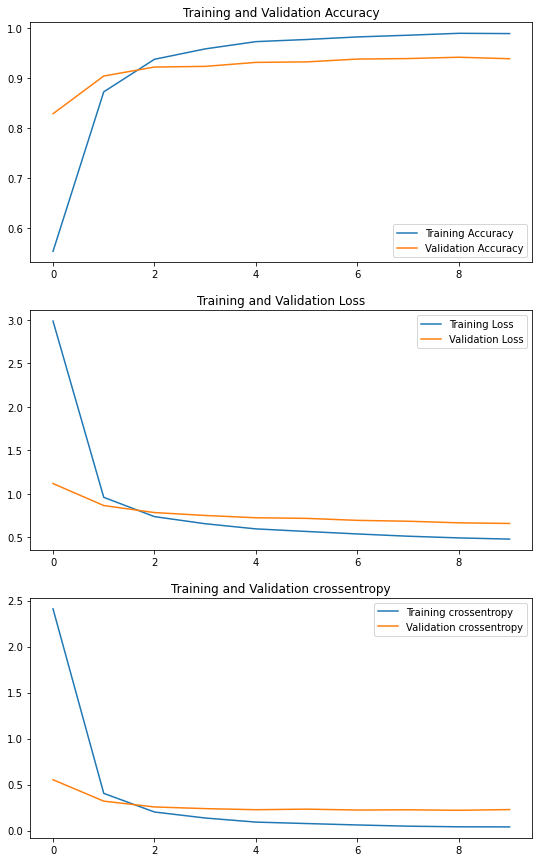

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

ce = history.history['Sparse_Categorical_Crossentropy']
val_ce = history.history['val_Sparse_Categorical_Crossentropy']



epochs_range = range(epochs)

plt.figure(figsize=(9, 15))
plt.subplot(3, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(3, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(3, 1, 3)
plt.plot(epochs_range, ce, label='Training crossentropy')
plt.plot(epochs_range, val_ce, label='Validation crossentropy')
plt.legend(loc='upper right')
plt.title('Training and Validation crossentropy')
plt.show()


In [43]:
print(history.history.keys())

dict_keys(['loss', 'Sparse_Categorical_Crossentropy', 'accuracy', 'val_loss', 'val_Sparse_Categorical_Crossentropy', 'val_accuracy'])


In [13]:
batch_size = 32
STEPS_PER_EPOCH = batch_size
data_dir = 'C:\\Users\\Cheon\\MasterData\\newTestSet'
nts_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  image_size=(64, 64),
  seed=123,
  batch_size=batch_size)

Found 139 files belonging to 8 classes.


In [15]:
print("Evaluate on test data")
results = model.evaluate(nts_ds, batch_size=32)
print("test loss, test acc:", results)


Evaluate on test data
5/5 [==============================] - 1s 33ms/step - loss: 0.5574 - Sparse_Categorical_Crossentropy: 0.1506 - accuracy: 0.9568
test loss, test acc: [0.5574239492416382, 0.15063758194446564, 0.9568345546722412]


In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [1]:
print('hi')

hi


In [81]:
from sklearn.metrics import confusion_matrix
#Predict
y_prediction = model.predict(x_test)

#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')


In [9]:
#----HYPERTUNING EXPERIMENT

img_height = 256
img_width = 256

def build_model(hp):
    # create model object
    model = keras.Sequential([
    #adding first convolutional layer    
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_1_filter', min_value=16, max_value=32, step=16),
        # adding filter size or kernel size
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #activation function
        activation='relu',
        input_shape=(256,256,3)),
    # adding second convolutional layer 
    keras.layers.Conv2D(
        #adding filter 
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        #adding filter size or kernel size
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        #activation function
        activation='relu'
    ),
    # adding flatten layer    
    keras.layers.Flatten(),
    # adding dense layer    
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    # output layer    
    keras.layers.Dense(8, activation='softmax')
    ])
    #compilation of model
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [10]:
#importing random search
import keras_tuner
from kerastuner import RandomSearch
#creating randomsearch object
tuner = RandomSearch(build_model,
                    objective='val_accuracy',
                    max_trials = 5)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# search best parameter
tuner.search(train_ds,epochs=10,validation_data=(val_ds),callbacks=[stop_early], verbose=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json


ResourceExhaustedError: failed to allocate memory [Op:Mul]

In [16]:
#Save model
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [35]:
#Test predicting individual models
import numpy as np
import argparse
import cv2
import os
test =  cv2.imread('C:\\Users\\cheon\\MasterData\\newTestSet\\LForward\\PR2sbnt237.png');


In [36]:
width = 64
height = 64
dim = (width, height)
 
# resize image
resizedTest = cv2.resize(test, dim)

In [37]:
print('Resized Dimensions : ',resizedTest.shape)
 
cv2.imshow("Resized image", resizedTest)
cv2.waitKey(0)
cv2.destroyAllWindows()

Resized Dimensions :  (64, 64, 3)


In [38]:
img = resizedTest
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


In [40]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 19ms/step
This image most likely belongs to LForward with a 91.49 percent confidence.
